In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
if os.name =='nt':
    font_family ="Malgun Gothic"
else:
    font_family="AppleGothic"
    
sns.set(font=font_family, rc ={"axes.unicode_minus": False})

In [2]:
df=pd.read_csv('부산_정답포함.csv', encoding='euckr')
df

,index_부산 보행등,교육시설,도서관,버스정류소,복지관,시각장애인협회,안마원,주민센터,지하철,터미널,편의점,약국,병원,관할구별 시각장애인 수,label,smart_label
0,1,2417.879656,12705.060760,141.605483,1037.862825,12413.490090,1701.868620,1022.863654,314.344945,4231.693661,145.445152,814.169768,557.720095,1724,1,1
1,2,2435.553629,12720.660220,126.183552,1051.315521,12433.327920,1713.321603,1042.188031,306.005236,4246.960340,133.241979,811.377867,575.154499,1724,1,1
2,3,6444.897700,14024.588570,75.101932,1137.888200,9737.092056,777.585976,211.149550,499.571548,1680.802262,285.997005,19.001587,19.001587,1724,1,1
3,4,6458.035113,14035.173160,68.832494,1127.685462,9741.790396,787.771837,199.002832,490.075206,1673.688035,274.359834,31.584851,31.584851,1724,1,1
4,5,5933.995947,16237.446680,36.608591,39.897317,15465.223390,186.414343,383.085229,355.408493,7248.261659,150.637497,50.977776,39.082138,1724,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9049,9050,13164.708470,9764.163274,59.501073,1150.794805,2943.170470,631.621888,284.405242,250.403414,711.740290,85.875810,88.657403,68.252058,312,1,0
9050,9051,13136.090140,9782.988604,82.203006,1146.496242,2923.297271,629.519271,310.892781,301.131537,685.109598,115.136919,118.531701,77.334476,312,1,0
9051,9052,13123.891020,9764.341811,65.867680,1129.115339,2908.745138,611.774408,292.922164,302.739372,672.012179,124.810210,128.102822,59.278163,312,1,0
9052,9053,13335.198000,9818.774662,59.812683,1087.443708,3100.839539,765.410954,371.050538,77.510091,884.281205,38.117834,47.473434,47.473434,312,1,1


In [3]:
df.columns

Index(['index_부산 보행등', '교육시설', '도서관', '버스정류소', '복지관', '시각장애인협회', '안마원', '주민센터',
       '지하철', '터미널', '편의점', '약국', '병원', '관할구별 시각장애인 수', 'label',
       'smart_label'],
      dtype='object')

In [4]:
df.describe()

,index_부산 보행등,교육시설,도서관,버스정류소,복지관,시각장애인협회,안마원,주민센터,지하철,터미널,편의점,약국,병원,관할구별 시각장애인 수,label,smart_label
count,9054.000000,9054.000000,9054.000000,9054.000000,9054.000000,9054.000000,9054.000000,9054.000000,9054.000000,9054.000000,9054.000000,9054.000000,9054.000000,9054.000000,9054.000000,9054.000000
mean,4527.500000,11211.907405,11509.415767,83.759791,1323.865769,10897.769491,1757.669133,1088.835351,2701.601313,5433.161866,261.576222,525.484083,410.444004,1177.103601,0.460901,0.374199
std,2613.809002,7024.763654,5721.438637,96.452867,1440.257534,6414.604919,2283.931190,1401.960419,3720.177405,4075.837667,359.417496,838.150820,667.540241,479.050224,0.498496,0.483942
min,1.000000,94.914708,132.135043,0.423618,12.498616,103.211486,8.937651,10.403904,3.590091,41.780512,4.061726,5.888781,6.203348,312.000000,0.000000,0.000000
25%,2264.250000,5933.995484,7752.086682,30.515187,446.170881,6289.812516,431.568968,299.840183,415.247968,2352.384159,79.358027,101.087153,65.877966,806.000000,0.000000,0.000000
50%,4527.500000,9403.183679,11023.640800,54.736090,821.384148,9489.014310,795.230620,516.962936,830.754773,4183.971714,148.473166,227.549926,166.416951,1238.000000,0.000000,0.000000
75%,6790.750000,15615.429458,13883.030527,101.506264,1471.486273,14208.504297,1931.305378,1030.986287,2999.408454,7529.284639,273.286939,460.626275,386.952533,1724.000000,1.000000,1.000000
max,9054.000000,32452.566760,32600.883940,1444.369021,10565.250900,33716.078580,12145.648850,6861.291763,17018.411820,21239.371510,4255.561713,7459.996088,5513.734041,1831.000000,1.000000,1.000000


In [5]:
scaler=['교육시설', '도서관', '버스정류소', '복지관', '시각장애인협회', '안마원', '주민센터','지하철', '터미널', '편의점', '약국', '병원']
df[scaler] = np.log(df[scaler])
df

,index_부산 보행등,교육시설,도서관,버스정류소,복지관,시각장애인협회,안마원,주민센터,지하철,터미널,편의점,약국,병원,관할구별 시각장애인 수,label,smart_label
0,1,7.790646,9.449756,4.953045,6.944919,9.426539,7.439482,6.930361,5.750491,8.350358,4.979799,6.702169,6.323857,1724,1,1
1,2,7.797929,9.450983,4.837738,6.957798,9.428136,7.446189,6.949078,5.723602,8.353959,4.892167,6.698734,6.354639,1724,1,1
2,3,8.771044,9.548567,4.318846,7.036929,9.183698,6.656194,5.352567,6.213751,7.427026,5.655981,2.944523,2.944523,1724,1,1
3,4,8.773080,9.549322,4.231676,7.027923,9.184180,6.669209,5.293319,6.194559,7.422785,5.614441,3.452678,3.452678,1724,1,1
4,5,8.688453,9.695075,3.600283,3.686309,9.646349,5.227972,5.948257,5.873268,8.888517,5.014876,3.931390,3.665666,1724,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9049,9050,9.485295,9.186474,4.085994,7.048208,7.987243,6.448291,5.650400,5.523073,6.567713,4.452902,4.484780,4.223208,312,1,0
9050,9051,9.483119,9.188400,4.409192,7.044466,7.980467,6.444956,5.739448,5.707547,6.529579,4.746122,4.775180,4.348140,312,1,0
9051,9052,9.482190,9.186492,4.187648,7.029190,7.975477,6.416364,5.679907,5.712872,6.510276,4.826794,4.852833,4.082241,312,1,0
9052,9053,9.498162,9.192052,4.091218,6.991585,8.039428,6.640413,5.916338,4.350408,6.784775,3.640682,3.860170,3.860170,312,1,1


In [6]:
df.describe()

,index_부산 보행등,교육시설,도서관,버스정류소,복지관,시각장애인협회,안마원,주민센터,지하철,터미널,편의점,약국,병원,관할구별 시각장애인 수,label,smart_label
count,9054.000000,9054.000000,9054.000000,9054.000000,9054.000000,9054.000000,9054.000000,9054.000000,9054.000000,9054.000000,9054.000000,9054.000000,9054.000000,9054.000000,9054.000000,9054.000000
mean,4527.500000,9.073070,9.204488,3.995786,6.716070,9.107781,6.785906,6.378948,6.990900,8.298366,5.025816,5.439028,5.141947,1177.103601,0.460901,0.374199
std,2613.809002,0.792995,0.604427,0.941102,0.995049,0.666116,1.192506,1.082071,1.384414,0.835052,1.015789,1.282883,1.328414,479.050224,0.498496,0.483942
min,1.000000,4.552979,4.883824,-0.858922,2.525618,4.636780,2.190273,2.342181,1.278177,3.732430,1.401608,1.773049,1.825089,312.000000,0.000000,0.000000
25%,2264.250000,8.688453,8.955717,3.418224,6.100702,8.746687,6.067427,5.703250,6.028876,7.763185,4.373970,4.615983,4.187804,806.000000,0.000000,0.000000
50%,4527.500000,9.148804,9.307797,4.002523,6.710991,9.157890,6.678632,6.247971,6.722335,8.339016,5.000404,5.427370,5.114496,1238.000000,0.000000,0.000000
75%,6790.750000,9.656015,9.538423,4.620120,7.294028,9.561596,7.565951,6.938271,8.006170,8.926555,5.610522,6.132587,5.958302,1724.000000,1.000000,1.000000
max,9054.000000,10.387535,10.392095,7.275428,9.265326,10.425730,9.404726,8.833651,9.742051,9.963612,8.355982,8.917310,8.614997,1831.000000,1.000000,1.000000


In [7]:
df.corr()

,index_부산 보행등,교육시설,도서관,버스정류소,복지관,시각장애인협회,안마원,주민센터,지하철,터미널,편의점,약국,병원,관할구별 시각장애인 수,label,smart_label
index_부산 보행등,1.000000,0.402141,0.011572,0.027469,0.261525,0.132691,0.318104,0.282239,0.239185,0.288408,0.230425,0.257727,0.259170,-0.450335,-0.197031,-0.134995
교육시설,0.402141,1.000000,0.151295,0.139993,0.447414,0.168363,0.473701,0.484062,0.519280,0.523923,0.259014,0.411794,0.428868,-0.384667,-0.252248,-0.154218
도서관,0.011572,0.151295,1.000000,0.072799,0.250629,0.460115,0.253393,0.309902,0.432372,0.386981,0.163914,0.205931,0.211664,-0.235562,-0.127008,-0.111126
버스정류소,0.027469,0.139993,0.072799,1.000000,0.135206,0.126895,0.135454,0.175324,0.115524,0.082675,0.154320,0.203957,0.231275,-0.065361,-0.124808,-0.107516
복지관,0.261525,0.447414,0.250629,0.135206,1.000000,0.441687,0.666983,0.532043,0.613461,0.433985,0.407163,0.504849,0.501848,-0.403104,-0.365956,-0.301112
시각장애인협회,0.132691,0.168363,0.460115,0.126895,0.441687,1.000000,0.494035,0.518663,0.504658,0.502867,0.270309,0.374302,0.356940,-0.168171,-0.275109,-0.263051
안마원,0.318104,0.473701,0.253393,0.135454,0.666983,0.494035,1.000000,0.661439,0.690115,0.527306,0.491369,0.637989,0.634279,-0.462199,-0.408290,-0.351508
주민센터,0.282239,0.484062,0.309902,0.175324,0.532043,0.518663,0.661439,1.000000,0.624636,0.561488,0.426312,0.619242,0.631209,-0.450481,-0.375473,-0.321583
지하철,0.239185,0.519280,0.432372,0.115524,0.613461,0.504658,0.690115,0.624636,1.000000,0.599103,0.402702,0.558098,0.554223,-0.556316,-0.403159,-0.317499
터미널,0.288408,0.523923,0.386981,0.082675,0.433985,0.502867,0.527306,0.561488,0.599103,1.000000,0.291456,0.420415,0.422093,-0.256630,-0.295292,-0.223554


<AxesSubplot:title={'center':'Person Correlation of Features'}>

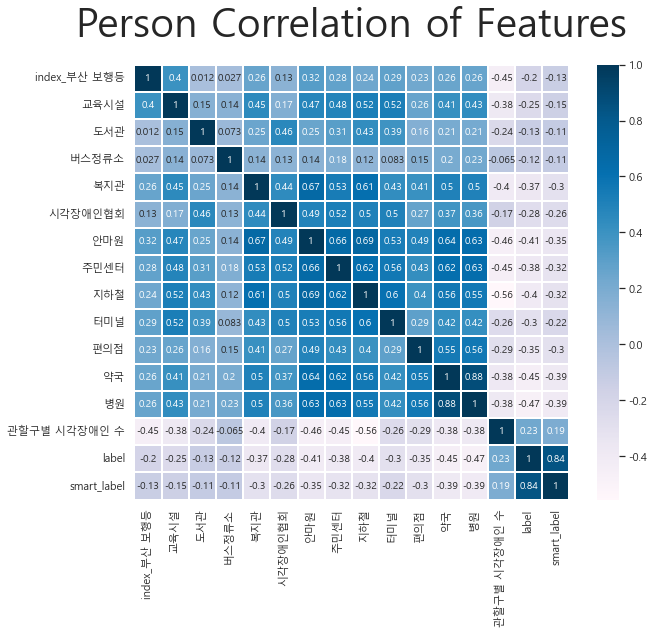

In [8]:
heatmap_data=df
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Person Correlation of Features", y = 1.05, size = 40)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 10})

In [9]:
#음향신호

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df,df['smart_label'], test_size=0.2, random_state=42, \
                                                    stratify=df['smart_label'])

x_train=x_train.drop(['index_부산 보행등','smart_label'],axis=1)
x_test=x_test.drop(['index_부산 보행등','smart_label'],axis=1)

In [10]:
from sklearn.preprocessing import RobustScaler

scaler=['교육시설', '도서관', '버스정류소', '복지관', '시각장애인협회', '안마원', '주민센터','지하철', '터미널', '편의점', '약국', '병원']
rbs = RobustScaler()
x_train[scaler]=rbs.fit_transform(x_train[scaler])
x_test[scaler]=rbs.fit_transform(x_test[scaler])

In [11]:
#로지스틱
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(x_train, y_train)
some_predicted2 = model2.predict(x_test)
print(model2.score(x_train, y_train))

0.9134336600855999


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
accuracy_score(y_test, some_predicted2)

0.9116510215350635

In [13]:
model2.predict_proba(x_test)

array([[0.99663016, 0.00336984],
       [0.07077842, 0.92922158],
       [0.21221653, 0.78778347],
       ...,
       [0.99466367, 0.00533633],
       [0.15714968, 0.84285032],
       [0.9943558 , 0.0056442 ]])

In [14]:
#의사결정트리
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier()
model3.fit(x_train, y_train)
from sklearn.metrics import mean_squared_error
some_predicted3 = model3.predict(x_test)
mse3 = np.sqrt(mean_squared_error(some_predicted3, y_test))
print('평균제곱근오차', mse3)

평균제곱근오차 0.21536762452627753


In [15]:
accuracy_score(y_test, some_predicted3)

0.9536167863059083

In [16]:
print(model3.score(x_train, y_train))

1.0


In [17]:
#SVM
from sklearn import svm
model4 = svm.SVC()
model4.fit(x_train, y_train)
some_predicted4=model4.predict(x_test)
accuracy_score(y_test, some_predicted4)

0.6256212037548315

In [18]:
print(model4.score(x_train, y_train))

0.6258456440701367


In [19]:
#랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
model5 = RandomForestClassifier()
model5.fit(x_train, y_train)
from sklearn.metrics import mean_squared_error
some_predicted5 = model5.predict(x_test)
mse5= np.sqrt(mean_squared_error(some_predicted5,y_test))
print('평균제곱근오차', mse5)

평균제곱근오차 0.14099120594778497


In [20]:
print(model5.score(x_train, y_train))

1.0


In [21]:
accuracy_score(y_test, some_predicted5)

0.9801214798453893

In [22]:
#음향신호기 예측 모델


from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df,df['label'], test_size=0.2, random_state=42, \
                                                    stratify=df['label'])

x_train=x_train.drop(['index_부산 보행등','smart_label','label'],axis=1)
x_test=x_test.drop(['index_부산 보행등','smart_label','label'],axis=1)

In [23]:
from sklearn.preprocessing import RobustScaler

scaler=['교육시설', '도서관', '버스정류소', '복지관', '시각장애인협회', '안마원', '주민센터','지하철', '터미널', '편의점', '약국', '병원']
rbs = RobustScaler()
x_train[scaler]=rbs.fit_transform(x_train[scaler])
x_test[scaler]=rbs.fit_transform(x_test[scaler])

In [24]:
y=df['smart_label']
y

0       1
1       1
2       1
3       1
4       1
       ..
9049    0
9050    0
9051    0
9052    1
9053    1
Name: smart_label, Length: 9054, dtype: int64

In [26]:
re = df.drop(['index_부산 보행등','smart_label','label'],axis=1)
scaler=['교육시설', '도서관', '버스정류소', '복지관', '시각장애인협회', '안마원', '주민센터','지하철', '터미널', '편의점', '약국', '병원']
re[scaler]=rbs.fit_transform(re[scaler])
re

,교육시설,도서관,버스정류소,복지관,시각장애인협회,안마원,주민센터,지하철,터미널,편의점,약국,병원,관할구별 시각장애인 수
0,-1.403691,0.243619,0.790852,0.196030,0.329667,0.507733,0.552533,-0.491502,0.009749,-0.016663,0.840562,0.683063,1724
1,-1.396163,0.245725,0.694914,0.206822,0.331627,0.512209,0.567688,-0.505101,0.012844,-0.087532,0.838297,0.700448,1724
2,-0.390424,0.413193,0.263187,0.273134,0.031670,-0.014973,-0.725011,-0.257212,-0.783920,0.530165,-1.637110,-1.225629,1724
3,-0.388320,0.414488,0.190659,0.265587,0.032261,-0.006289,-0.772984,-0.266918,-0.787566,0.496571,-1.302049,-0.938617,1724
4,-0.475784,0.664621,-0.334671,-2.534665,0.599403,-0.968060,-0.242679,-0.429408,0.472335,0.011704,-0.986401,-0.818318,1724
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9049,0.347773,-0.208207,0.069450,0.282586,-1.436537,-0.153712,-0.483855,-0.606516,-1.522561,-0.442765,-0.621514,-0.503411,312
9050,0.345523,-0.204901,0.338356,0.279450,-1.444851,-0.155937,-0.411752,-0.513220,-1.555340,-0.205638,-0.430033,-0.432848,312
9051,0.344563,-0.208176,0.154027,0.266649,-1.450975,-0.175018,-0.459963,-0.510527,-1.571932,-0.140398,-0.378831,-0.583031,312
9052,0.361071,-0.198635,0.073795,0.235136,-1.372498,-0.025505,-0.268524,-1.199582,-1.335981,-1.099607,-1.033361,-0.708459,312


In [25]:
#로지스틱
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(x_train, y_train)
some_predicted2 = model2.predict(x_test)
print(model2.score(x_train, y_train))

0.7224906806571862


In [28]:
print(model2.score(re, y))

0.6876518665783079


In [29]:
some_predicted2 = model2.predict(re)

In [30]:
accuracy_score(y, some_predicted2)

0.6876518665783079

In [ ]:
#의사결정트리
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier()
model3.fit(x_train, y_train)
from sklearn.metrics import mean_squared_error
some_predicted3 = model3.predict(x_test)
mse3 = np.sqrt(mean_squared_error(some_predicted3, y_test))
print('평균제곱근오차', mse3)

In [ ]:
accuracy_score(y_test, some_predicted3)

In [ ]:
#SVM
from sklearn import svm
model4 = svm.SVC()
model4.fit(x_train, y_train)
some_predicted4=model4.predict(x_test)
accuracy_score(y_test, some_predicted4)

In [ ]:
print(model4.score(x_train, y_train))

In [ ]:
#SVM
from sklearn import svm
model4 = svm.SVC()
model4.fit(x_train, y_train)
some_predicted4=model4.predict(x_test)
accuracy_score(y_test, some_predicted4)

In [ ]:
print(model4.score(x_train, y_train))

In [ ]:
#랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
model5 = RandomForestClassifier()
model5.fit(x_train, y_train)
from sklearn.metrics import mean_squared_error
some_predicted5 = model5.predict(x_test)
mse5= np.sqrt(mean_squared_error(some_predicted5,y_test))
print('평균제곱근오차', mse5)

In [ ]:
print(model5.score(x_train, y_train))

In [ ]:
accuracy_score(y_test, some_predicted5)

In [32]:
df2=pd.read_csv('부산데이터셋.csv', encoding='euckr')
df2

,index_부산 보행등,교육시설,도서관,버스정류소,복지관,시각장애인협회,안마원,주민센터,지하철,터미널,...,버스정류소1,복지관1,시각장애인협회1,안마원1,주민센터1,지하철역1,터미널1,편의점1,약국1,병원1
0,1,2417.879656,12705.060760,141.605483,1037.862825,12413.490090,1701.868620,1022.863654,314.344945,4231.693661,...,80,0,0,0,1,6,0,4,6,10
1,2,2435.553629,12720.660220,126.183552,1051.315521,12433.327920,1713.321603,1042.188031,306.005236,4246.960340,...,81,0,0,0,1,6,0,4,6,9
2,3,6444.897700,14024.588570,75.101932,1137.888200,9737.092056,777.585976,211.149550,499.571548,1680.802262,...,45,0,0,1,1,14,0,26,13,66
3,4,6458.035113,14035.173160,68.832494,1127.685462,9741.790396,787.771837,199.002832,490.075206,1673.688035,...,44,0,0,1,1,14,0,26,13,64
4,5,5933.995947,16237.446680,36.608591,39.897317,15465.223390,186.414343,383.085229,355.408493,7248.261659,...,49,5,0,3,3,8,0,19,20,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9049,9050,13164.708470,9764.163274,59.501073,1150.794805,2943.170470,631.621888,284.405242,250.403414,711.740290,...,96,0,0,4,7,31,1,51,33,143
9050,9051,13136.090140,9782.988604,82.203006,1146.496242,2923.297271,629.519271,310.892781,301.131537,685.109598,...,95,0,0,4,7,29,1,50,35,145
9051,9052,13123.891020,9764.341811,65.867680,1129.115339,2908.745138,611.774408,292.922164,302.739372,672.012179,...,96,0,0,4,7,29,1,50,33,142
9052,9053,13335.198000,9818.774662,59.812683,1087.443708,3100.839539,765.410954,371.050538,77.510091,884.281205,...,109,0,0,4,8,33,1,52,41,173


In [33]:
df2.columns

Index(['index_부산 보행등', '교육시설', '도서관', '버스정류소', '복지관', '시각장애인협회', '안마원', '주민센터',
       '지하철', '터미널', '편의점', '약국', '병원', '관할구별 시각장애인 수', '교통사고', 'label',
       'smart_label', '교육시설50', '도서관50', '버스정류소50', '복지관50', '시각장애인협회50',
       '안마원50', '주민센터50', '지하철역50', '터미널50', '편의점50', '약국50', '병원50', '교육시설1',
       '도서관1', '버스정류소1', '복지관1', '시각장애인협회1', '안마원1', '주민센터1', '지하철역1', '터미널1',
       '편의점1', '약국1', '병원1'],
      dtype='object')

In [34]:
scaler=['교육시설', '도서관', '버스정류소', '복지관', '시각장애인협회', '안마원', '주민센터','지하철', '터미널', '편의점', '약국', '병원']
df2[scaler] = np.log(df2[scaler])
df2

,index_부산 보행등,교육시설,도서관,버스정류소,복지관,시각장애인협회,안마원,주민센터,지하철,터미널,...,버스정류소1,복지관1,시각장애인협회1,안마원1,주민센터1,지하철역1,터미널1,편의점1,약국1,병원1
0,1,7.790646,9.449756,4.953045,6.944919,9.426539,7.439482,6.930361,5.750491,8.350358,...,80,0,0,0,1,6,0,4,6,10
1,2,7.797929,9.450983,4.837738,6.957798,9.428136,7.446189,6.949078,5.723602,8.353959,...,81,0,0,0,1,6,0,4,6,9
2,3,8.771044,9.548567,4.318846,7.036929,9.183698,6.656194,5.352567,6.213751,7.427026,...,45,0,0,1,1,14,0,26,13,66
3,4,8.773080,9.549322,4.231676,7.027923,9.184180,6.669209,5.293319,6.194559,7.422785,...,44,0,0,1,1,14,0,26,13,64
4,5,8.688453,9.695075,3.600283,3.686309,9.646349,5.227972,5.948257,5.873268,8.888517,...,49,5,0,3,3,8,0,19,20,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9049,9050,9.485295,9.186474,4.085994,7.048208,7.987243,6.448291,5.650400,5.523073,6.567713,...,96,0,0,4,7,31,1,51,33,143
9050,9051,9.483119,9.188400,4.409192,7.044466,7.980467,6.444956,5.739448,5.707547,6.529579,...,95,0,0,4,7,29,1,50,35,145
9051,9052,9.482190,9.186492,4.187648,7.029190,7.975477,6.416364,5.679907,5.712872,6.510276,...,96,0,0,4,7,29,1,50,33,142
9052,9053,9.498162,9.192052,4.091218,6.991585,8.039428,6.640413,5.916338,4.350408,6.784775,...,109,0,0,4,8,33,1,52,41,173


In [37]:
data=df2[['교육시설', '도서관', '버스정류소', '복지관', '시각장애인협회', '안마원', '주민센터','지하철', '터미널', '편의점', '약국', '병원', '관할구별 시각장애인 수','label','smart_label']]

data2=df2[['교육시설50', '도서관50', '버스정류소50', '복지관50', '시각장애인협회50','안마원50', '주민센터50', '지하철역50', '터미널50', '편의점50', '약국50', '병원50','label','smart_label']]

data3=df2[['교육시설1', '도서관1', '버스정류소1', '복지관1', '시각장애인협회1', '안마원1', '주민센터1', '지하철역1', '터미널1','편의점1', '약국1', '병원1','label','smart_label']]


<AxesSubplot:title={'center':'Person Correlation of Features'}>

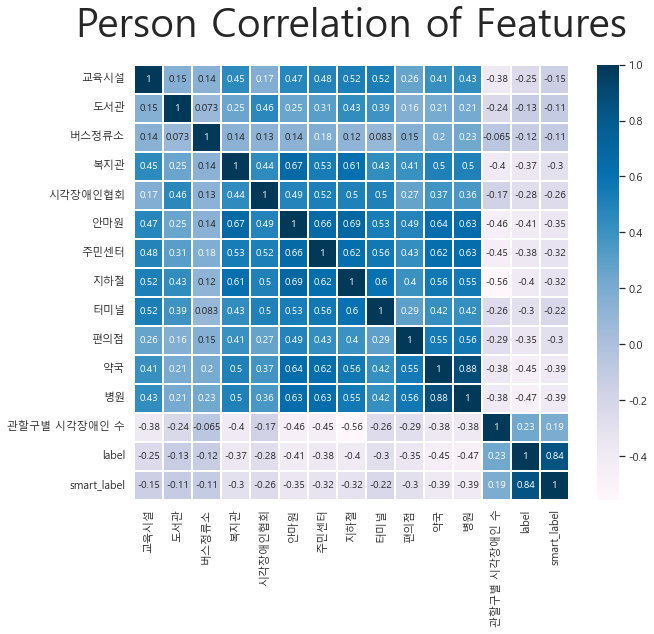

In [38]:
heatmap_data=data
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Person Correlation of Features", y = 1.05, size = 40)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 10})

<AxesSubplot:title={'center':'Person Correlation of Features'}>

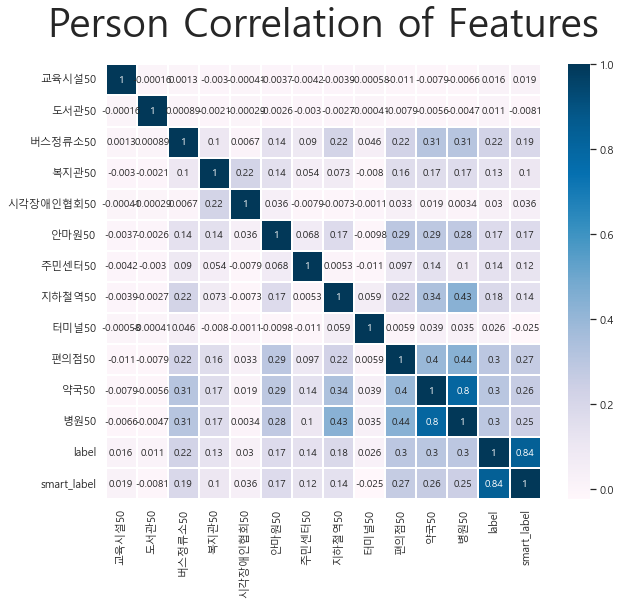

In [39]:
heatmap_data=data2
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Person Correlation of Features", y = 1.05, size = 40)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 10})

<AxesSubplot:title={'center':'Person Correlation of Features'}>

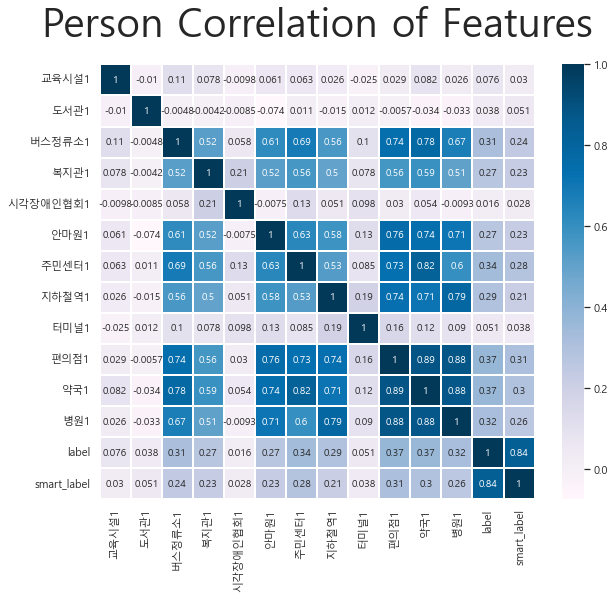

In [40]:
heatmap_data=data3
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Person Correlation of Features", y = 1.05, size = 40)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 10})

In [41]:
#음향신호

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df2,df2['label'], test_size=0.2, random_state=42, \
                                                    stratify=df2['label'])

x_train=x_train.drop(['index_부산 보행등','smart_label','label'],axis=1)
x_test=x_test.drop(['index_부산 보행등','smart_label','label'],axis=1)

In [42]:
from sklearn.preprocessing import RobustScaler

scaler=['교육시설', '도서관', '버스정류소', '복지관', '시각장애인협회', '안마원', '주민센터','지하철', '터미널', '편의점', '약국', '병원']
rbs = RobustScaler()
x_train[scaler]=rbs.fit_transform(x_train[scaler])
x_test[scaler]=rbs.fit_transform(x_test[scaler])

In [43]:
#로지스틱
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(x_train, y_train)
some_predicted2 = model2.predict(x_test)
print(model2.score(x_train, y_train))

0.7153113350821483


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
#의사결정트리
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier()
model3.fit(x_train, y_train)
from sklearn.metrics import mean_squared_error
some_predicted3 = model3.predict(x_test)
mse3 = np.sqrt(mean_squared_error(some_predicted3, y_test))
print('평균제곱근오차', mse3)

평균제곱근오차 0.3264520719390974


In [45]:
print(model3.score(x_train, y_train))

1.0


In [46]:
#SVM
from sklearn import svm
model4 = svm.SVC()
model4.fit(x_train, y_train)
some_predicted4=model4.predict(x_test)
accuracy_score(y_test, some_predicted4)

0.6747653230259525

In [47]:
print(model4.score(x_train, y_train))

0.6526301256385476


In [48]:
#랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
model5 = RandomForestClassifier()
model5.fit(x_train, y_train)
from sklearn.metrics import mean_squared_error
some_predicted5 = model5.predict(x_test)
mse5= np.sqrt(mean_squared_error(some_predicted5,y_test))
print('평균제곱근오차', mse5)

평균제곱근오차 0.21148680892167743


In [49]:
print(model5.score(x_train, y_train))

1.0
